# 用 Matplotlib 绘制酒的类型和质量视图

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

wine_df = pd.read_csv('winequality_edited.csv')

### 为红葡萄酒条柱高度和白葡萄酒条柱高度创建数组
记住，颜色和质量等级的每个组合有一个条柱。每个条柱的高度基于这个颜色与这个质量等级的样本的比例。
1. 红葡萄酒条柱比例 = 每个质量等级的数量 / 红葡萄酒样本的总数
2. 白葡萄酒条柱比例 = 每个质量等级的数量 / 白葡萄酒样本的总数

In [44]:
# 获取每个等级和颜色的数量
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [45]:
# 获取每个颜色的总数
color_totals = wine_df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [46]:
# 将红葡萄酒等级数量除以红葡萄酒样本总数，获取比例
red_proportions = color_counts['red'] / color_totals['red']
a=list(red_proportions)

In [47]:
red_proportions[9]=0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

In [48]:
# 将白葡萄酒等级数量除以白葡萄酒样本总数，获取比例
white_proportions = color_counts['white'] / color_totals['white']
white_proportions


quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

### 在柱状图上绘制比例
设置每个等级组的 x 坐标位置和每个条柱的宽度。

In [7]:
ind = np.arange(len(red_proportions)+1)  # 组的 x 坐标位置
width = 0.35       # 条柱的宽度
ind+width

array([ 0.35,  1.35,  2.35,  3.35,  4.35,  5.35,  6.35,  7.35])

In [8]:
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

现在创建图表。

In [76]:
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

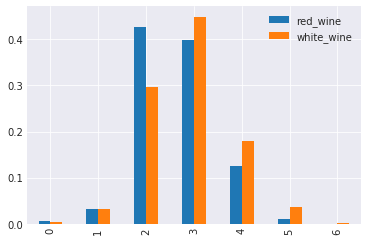

In [89]:
temp_df = pd.concat([pd.DataFrame(red_proportions), pd.DataFrame(white_proportions)], axis=1).reset_index()
temp_df.columns = ['quality', 'red_wine', 'white_wine']
temp_df[['red_wine', 'white_wine']].plot(kind='bar')

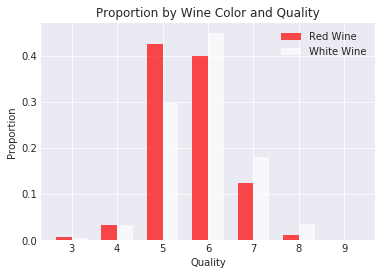

In [90]:
# 绘制条柱
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# 标题和标签
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # x 坐标刻度位置
labels = ['3', '4', '5', '6', '7', '8', '9']  # x 坐标刻度标签
plt.xticks(locations, labels)

# 图例
plt.legend()

操作没有成功，因为缺少第 9 等级的红葡萄酒值。虽然这个数字是 0，但是绘图时仍然需要写出。运行下面的框之后，再运行上面最后两个框。

In [13]:
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
9    0.000000
Name: pH, dtype: float64